# Est. Annual Reduction = 0.113 * Retired Credits + 70921.7

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.colors as mcolors
import numpy as np

In [2]:
projects = pd.read_excel('./resources/dataset/2023-03-30_Kita_Plus_Allied.xlsx', sheet_name = 'All_Projects_Allied')
methodologies = pd.read_excel('./resources/dataset/2023-03-30_Kita_Plus_Allied.xlsx', sheet_name = 'Methodologies')
countries = pd.read_excel('./resources/dataset/2023-03-30_Kita_Plus_Allied.xlsx', sheet_name = 'Countries')

In [3]:
merged = pd.merge(
    pd.merge(
        projects,
        methodologies,
        left_on = 'Methodology',
        right_on = 'MethodologyID',
        suffixes = ('_Projects', '_Methods')
    ),
    countries,
    left_on = 'Country',
    right_on = 'CountryCodeA3',
    how='left'
).reset_index(drop=True)

In [4]:
merged.loc[merged['SubSector'] == 'Biochar', 'Est.  Annual Emission Reduction'] = 0.113 * merged['Retired Credits'] + 70921.7
merged['MarketAnnualPotential'] = merged['Est.  Annual Emission Reduction'] * merged['Avg. Est Transaction Price']

In [5]:
grouped = merged.groupby(['RegionWB', 'CountryCodeA3', 'Sector_Methods', 'SubSector'])['MarketAnnualPotential'] \
    .sum() \
    .reset_index()

In [6]:
viz_region = pd.pivot_table(
    grouped, 
    values = 'MarketAnnualPotential', 
    index='RegionWB', 
    columns = ['SubSector'], 
    aggfunc = 'sum',
    fill_value=0
)

In [7]:
row_sort = ['North America', 'Latin America and Caribbean', 
            'Europe and Central Asia', 'Middle East and North Africa', 
            'Sub-Saharan Africa', 'South Asia', 'East Asia and Pacific']

col_sort = ['Forestry', 'Soil Carbon', 'Agriculture', 'Biochar', 'Renewable Energy', 'Energy Efficiency',
           'Fuel Switch', 'Biofuel', 'Energy Distribution', 'Industrial Gas', 'Manufacturing Industries',
           'Mining', 'Chemical Industries', 'Construction', 'Transport', 'Landfill',
           'Livestock and Agriculture', 'Wastewater', 'Industrial Waste', 'Solid Waste',
           'Household Devices']

In [8]:
viz_region.drop('Multi-Region').loc[row_sort, col_sort]

SubSector,Forestry,Soil Carbon,Agriculture,Biochar,Renewable Energy,Energy Efficiency,Fuel Switch,Biofuel,Energy Distribution,Industrial Gas,...,Mining,Chemical Industries,Construction,Transport,Landfill,Livestock and Agriculture,Wastewater,Industrial Waste,Solid Waste,Household Devices
RegionWB,,,,,,,,,,,,,,,,,,,,,
North America,3.236977e+08,4.765841e+06,0.00,6.462840e+07,5.032885e+06,22284304.88,723660.72,0.00,0.0,1142680.00,...,1297971.13,143102.16,0,0.00,2.460112e+08,11403431.88,1230830.50,2581996.20,179039.84,0.000000e+00
Latin America and Caribbean,2.055378e+08,8.867805e+05,0.00,9.941694e+06,4.730513e+07,10089299.44,2321898.70,598526.88,0.0,0.00,...,0.00,46440.00,0,4968480.84,1.015705e+07,2239054.43,0.00,0.00,0.00,2.153191e+06
Europe and Central Asia,3.578384e+04,0.000000e+00,1320443.52,1.779247e+08,8.285986e+07,448654.08,0.00,2535336.00,535986.1,181627.72,...,5380710.12,419417.58,0,0.00,1.591758e+07,7493477.58,0.00,0.00,326736.00,0.000000e+00
Middle East and North Africa,0.000000e+00,0.000000e+00,0.00,0.000000e+00,5.006703e+06,0.00,57897.75,0.00,0.0,0.00,...,0.00,0.00,0,0.00,4.220558e+05,0.00,0.00,0.00,0.00,0.000000e+00
Sub-Saharan Africa,4.604227e+07,1.471469e+08,670257.08,0.000000e+00,1.363526e+07,90516312.89,5818806.27,0.00,0.0,4830935.50,...,35871.96,1171760.00,0,0.00,1.008508e+07,0.00,0.00,0.00,0.00,1.175272e+08
South Asia,4.069509e+06,7.124174e+07,0.00,0.000000e+00,2.504208e+08,39039062.42,5522794.71,0.00,0.0,26105409.66,...,0.00,0.00,0,139944.00,0.000000e+00,0.00,246650.64,0.00,521486.00,4.841705e+06
East Asia and Pacific,1.989440e+08,8.249167e+07,0.00,3.144734e+07,1.694805e+08,9934547.35,0.00,0.00,0.0,26925048.52,...,11030851.08,734822.92,0,0.00,1.261348e+07,15093763.09,4566093.14,1841403.18,2241362.58,4.986732e+06


In [12]:
viz_region_na = viz_region.copy()

In [13]:
viz_region_na[viz_region_na < 10e6] = np.nan

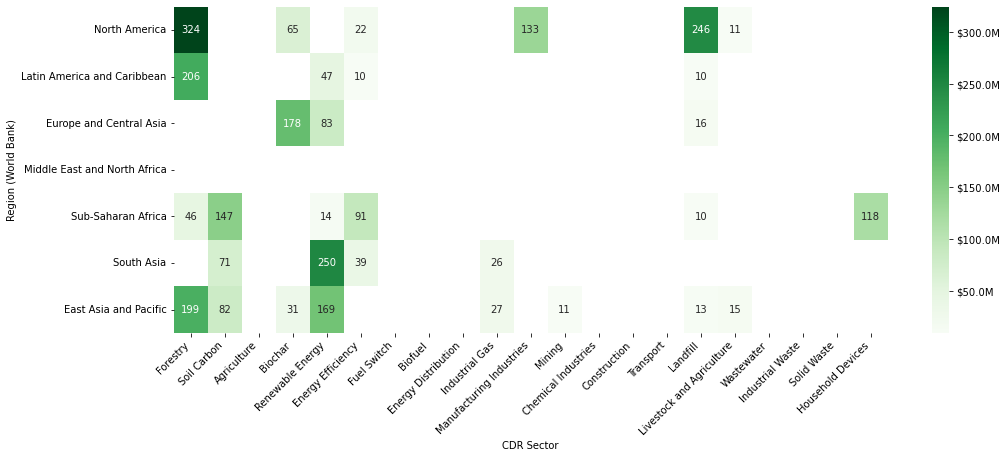

In [14]:
fig, ax = plt.subplots(figsize = (16, 6))
sns.heatmap(
    round(viz_region_na.drop('Multi-Region').loc[row_sort, col_sort] / 1e6), 
    cmap = 'Greens', 
    ax = ax,
    cbar_kws = {
        'format': ticker.FuncFormatter(lambda x, p: '$' + str(x) + 'M')
    },
    annot=True,
    fmt='.0f'
)
# s_x, s_y = np.meshgrid(range(data.shape[1]), range(data.shape[0]))
# ax.scatter(
#     x = s_x + 0.5,
#     y = s_y + 0.5,
#     c = 'pink',
#     s = s_data,
    
# )

ax.set_xlabel('CDR Sector')
ax.set_ylabel('Region (World Bank)')

plt.xticks(rotation = 45, ha='right')
plt.show()

fig.savefig('./Fig.svg')

In [15]:
by_est_reduction = merged.groupby(['RegionWB', 'CountryCodeA3', 'Sector_Methods', 'SubSector'])['Est.  Annual Emission Reduction'] \
    .sum() \
    .reset_index()

In [16]:
viz_reduction = pd.pivot_table(
    by_est_reduction, 
    values = 'Est.  Annual Emission Reduction', 
    index='RegionWB', 
    columns = ['SubSector'], 
    aggfunc = 'sum',
    fill_value=0
)

In [17]:
viz_reduction.drop('Multi-Region').loc[row_sort, col_sort]

SubSector,Forestry,Soil Carbon,Agriculture,Biochar,Renewable Energy,Energy Efficiency,Fuel Switch,Biofuel,Energy Distribution,Industrial Gas,...,Mining,Chemical Industries,Construction,Transport,Landfill,Livestock and Agriculture,Wastewater,Industrial Waste,Solid Waste,Household Devices
RegionWB,,,,,,,,,,,,,,,,,,,,,
North America,819580514,633239,3,358269.813,2030794,2893159,238648,0,0,2665486,...,16921833,24195110,0,1065146,44515321,10694842,280851,474720,45864,0
Latin America and Caribbean,38951949,100096,0,71012.100,21376821,1956396,637341,264836,12113,0,...,0,4000,0,1570914,3437177,453529,0,0,0,815145
Europe and Central Asia,465744,0,219203,781193.668,23565181,106569,2000,1321018,243996,50734,...,857296,61861,0,14794,4771929,1807648,0,0,1991754,0
Middle East and North Africa,34618,0,0,0.000,6023155,342522,13623,247871,0,0,...,0,0,0,0,176736,0,0,473826,0,0
Sub-Saharan Africa,7657634,18231897,99004,0.000,4084974,24912031,3656777,0,0,1281611,...,9643,97000,0,49829,2151406,0,0,0,8500,35159982
South Asia,405197,2407629,33764,0.000,93073933,49859289,2360343,0,0,12410146,...,0,0,0,66411,0,89006,101229,0,123432,5335998
East Asia and Pacific,25520726,11228653,58730,212924.091,68329038,4280118,3072,0,0,8520261,...,4195560,239356,0,140489,4636132,11893536,1515737,387753,2199834,4712374


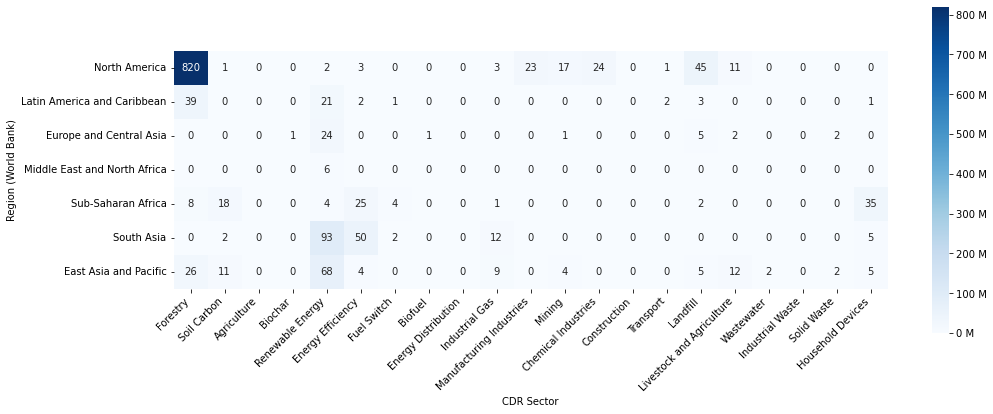

In [114]:
fig, ax = plt.subplots(figsize = (16, 6))
sns.heatmap(
    round(viz_reduction.drop('Multi-Region').loc[row_sort, col_sort] / 1e6), 
    cmap = 'Blues', 
    ax = ax,
    cbar_kws = {
        'format': ticker.FuncFormatter(lambda x, p: str(int(x)) + ' M')
    },
    annot=True,
    fmt='.0f',
    square = True

)

ax.set_xlabel('CDR Sector')
ax.set_ylabel('Region (World Bank)')

plt.xticks(rotation = 45, ha='right')
plt.show()

# fig.savefig('./Fig.svg')

In [131]:
def size_mapper(x):
    norm = lambda num: 250 * num
    if x > 100:
        return norm(4)
    elif x > 50:
        return norm(3)
    elif x > 10:
        return norm(2)
    elif x > 0:
        return norm(1)
    else:
        return 0
map_size = np.vectorize(size_mapper)

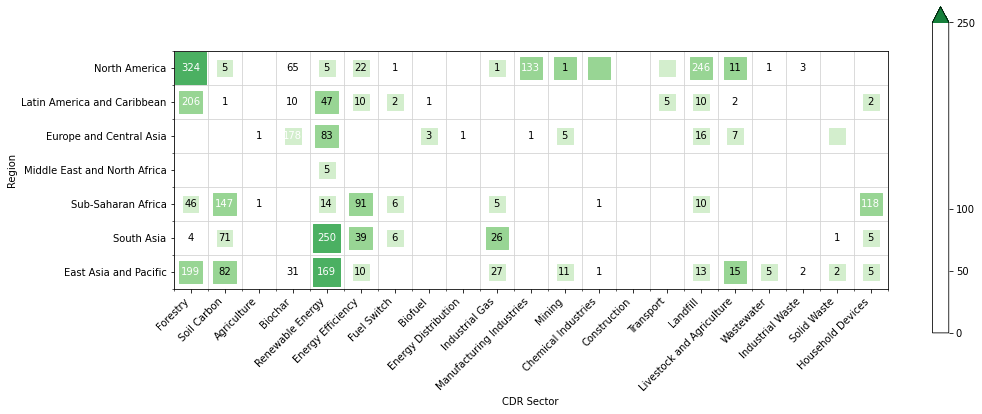

In [147]:
colors = sns.color_palette('Greens', 4)
levels = [0, 50, 100, 250]
cmap, norm = mcolors.from_levels_and_colors(levels, colors, extend = 'max')
data = np.round(viz_region.drop('Multi-Region').loc[row_sort, col_sort].values / 1e6).astype(int)
data_reduction = np.round(viz_reduction.drop('Multi-Region').loc[row_sort, col_sort].values / 1e6).astype(int)
s_data = map_size(data_reduction)
s_color = map_color(data)

fig, ax = plt.subplots(figsize = (16, 6))

im = ax.imshow(data, cmap = cmap, norm = norm, alpha=0)

ax.set(
    xticks = range(data.shape[1]),
    yticks = range(data.shape[0]),
    xticklabels = col_sort,
    yticklabels = row_sort,
    xlabel = 'CDR Sector',
    ylabel = 'Region'
)

s_x, s_y = np.meshgrid(range(data.shape[1]), range(data.shape[0]))
ax.scatter(
    x = s_x,
    y = s_y,
    s = s_data,
    c = s_data,
    cmap = cmap,
    marker = 's',
)

plt.xticks(rotation = 45, ha = 'right')

for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        if data[y, x] < 1:
            continue
            
        _c = 'black'
        if data[y, x] > 100:
            _c = 'white'
        plt.text(x, y, data[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 c = _c
                 )
        
# ax.spines[['top', 'right', 'bottom', 'left']].set_visible()

fig.colorbar(im, ax = ax, spacing = 'proportional')

ax.set_xticks(np.arange(-.5, 21, 1), minor=True)
ax.set_yticks(np.arange(-.5, 7, 1), minor=True)
ax.grid(which='minor', c = 'lightgray')

fig.savefig('./Fig_Value_.svg')

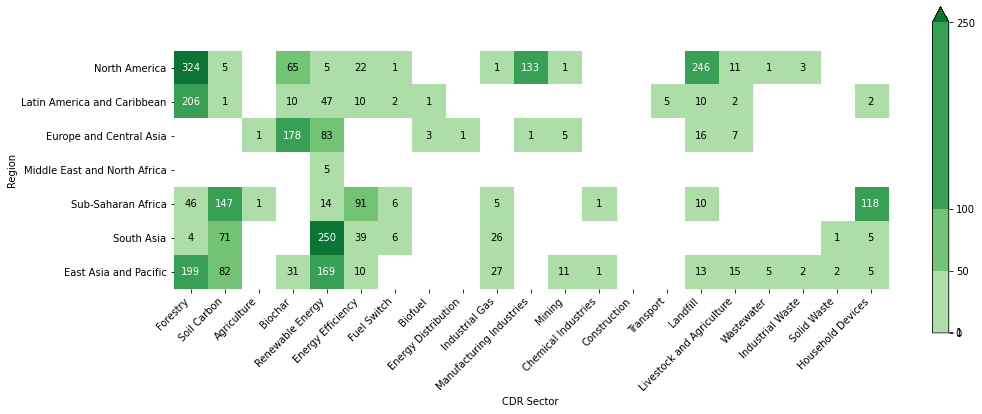

In [128]:
colors = sns.color_palette('Greens', 5)
levels = [0, 1, 50, 100, 250]
cmap, norm = mcolors.from_levels_and_colors(levels, colors, extend = 'max')
cmap.colors[0] = (1, 1, 1)
data = np.round(viz_region.drop('Multi-Region').loc[row_sort, col_sort].values / 1e6).astype(int)
data_reduction = np.round(viz_reduction.drop('Multi-Region').loc[row_sort, col_sort].values / 1e6).astype(int)
s_data = map_size(data_reduction)

fig, ax = plt.subplots(figsize = (16, 6))

im = ax.imshow(data, cmap = cmap, norm = norm, alpha=1)

ax.set(
    xticks = range(data.shape[1]),
    yticks = range(data.shape[0]),
    xticklabels = col_sort,
    yticklabels = row_sort,
    xlabel = 'CDR Sector',
    ylabel = 'Region'
)

plt.xticks(rotation = 45, ha = 'right')

for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        if data[y, x] < 1:
            continue
            
        _c = 'black'
        if data[y, x] > 100:
            _c = 'white'
        plt.text(x, y, data[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 c = _c
                 )
        
ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

fig.colorbar(im, ax = ax, spacing = 'proportional')



In [146]:
grouped.groupby('Sector_Methods')['MarketAnnualPotential'].sum() / 1e6

Sector_Methods
Energy                    764.269469
Household Devices         129.508848
Industrial Process        218.341062
Nature Based Solution    1086.850635
Waste                     629.113912
Name: MarketAnnualPotential, dtype: float64